This notebook aims at comparing easywave reference point locations

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def ew2py(fileName):
    """
        Reads EasyWave binary output into numpy arrays. 
        Works for .ssh and .sshmax files (at least).
        
        Example usage:

        lon, lat, h = ew2py(fileName)    
        plt.pcolormesh(lon,lat,h)
    """
    import struct
    from numpy import zeros, linspace

    f = open(fileName, 'rb')
    dsbb = f.read(4)

    nOutI = struct.unpack('h',f.read(2))[0]
    nOutJ = struct.unpack('h',f.read(2))[0]
    
    lonOutMin = struct.unpack('d',f.read(8))[0]
    lonOutMax = struct.unpack('d',f.read(8))[0]
    latOutMin = struct.unpack('d',f.read(8))[0]
    latOutMax = struct.unpack('d',f.read(8))[0]
    
    tmp = f.read(8)
    tmp = f.read(8)

    lon = linspace(lonOutMin,lonOutMax,nOutI)
    lat = linspace(latOutMin,latOutMax,nOutJ)
    values = zeros((nOutJ,nOutI))

    for j in range(nOutJ):
        for i in range(nOutI):
            value = f.read(4)
            value = struct.unpack('f',value)[0]
            values[j,i] = value
    return lon, lat, values

In [16]:
z = np.loadtxt('../data/bathymetryEasywave_3min.grd',skiprows=5)

In [17]:
z.shape

(2600, 4717)

0


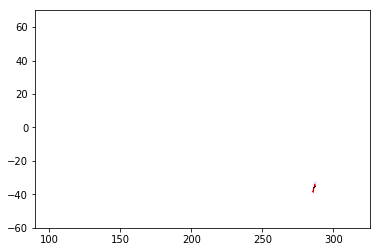

6000


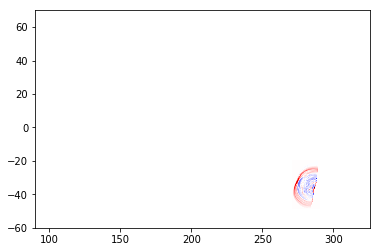

12000


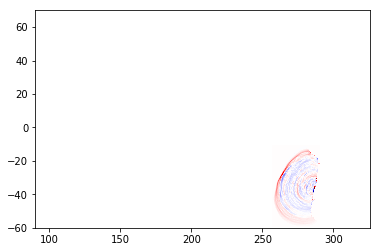

18000


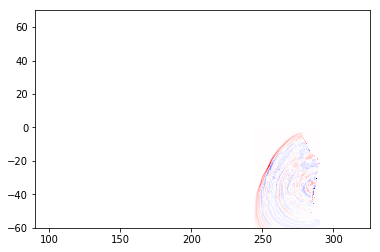

24000


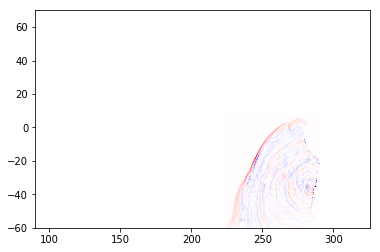

30000


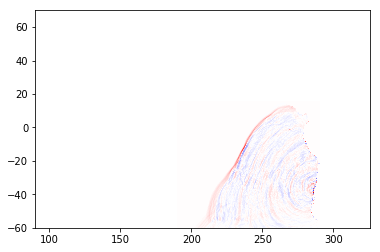

36000


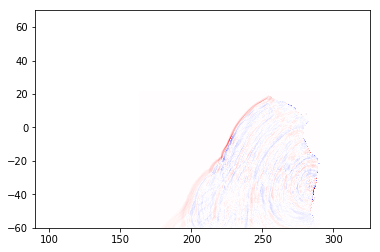

42000


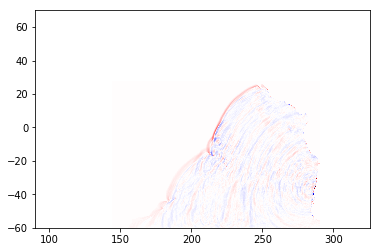

48000


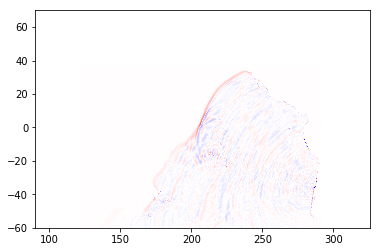

54000


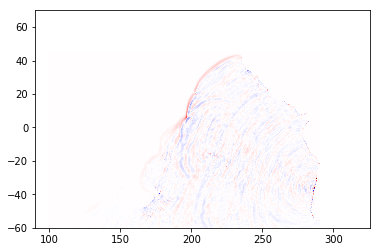

60000


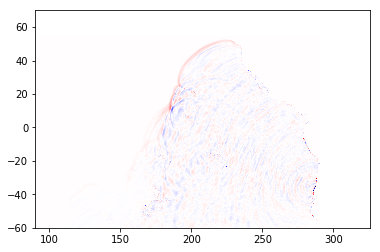

66000


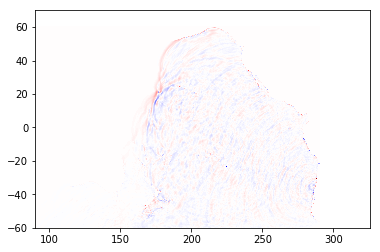

72000


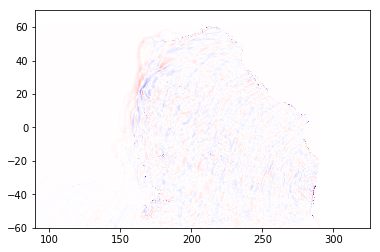

78000


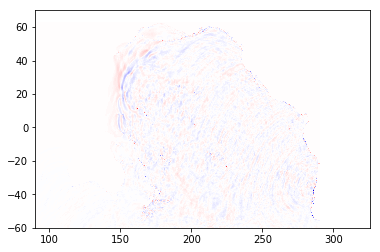

84000


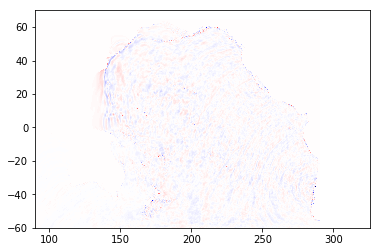

In [23]:
for i in range(0,90000,300*20):

#     i = 300
    print(i)
    fileName = '../easyWave/eWave.2D.{0:05d}.ssh'.format(i) 
    lon, lat, h0 = ew2py(fileName)
    f = plt.figure()
    ax = f.add_subplot(111)
    p = ax.pcolormesh(lon,lat,h0[:-1,:-1],cmap=plt.cm.seismic,vmin=-1,vmax=1)
    ax.set_xlim(90,325.83)
    ax.set_ylim(-60,70)
    plt.show(f)